<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_2_Exploring_Unsupervised_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Assignment 2: Exploring Unsupervised Learning Techniques
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score, completeness_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
# Loading the Dataset
# Loading the Wine Quality dataset
from google.colab import files

# Uploading files
uploaded = files.upload()
import pandas as pd
data = pd.read_csv('winequality-red.csv', sep=';')

Saving winequality-red.csv to winequality-red.csv


In [6]:
# Basic Data Cleaning
# Check for missing values
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [7]:
# Separating the features and target-quality used only for evaluation
X = data.drop("quality", axis=1)
y = data["quality"]

In [8]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Exploratory Data Analysis (EDA)
# Summary statistics
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


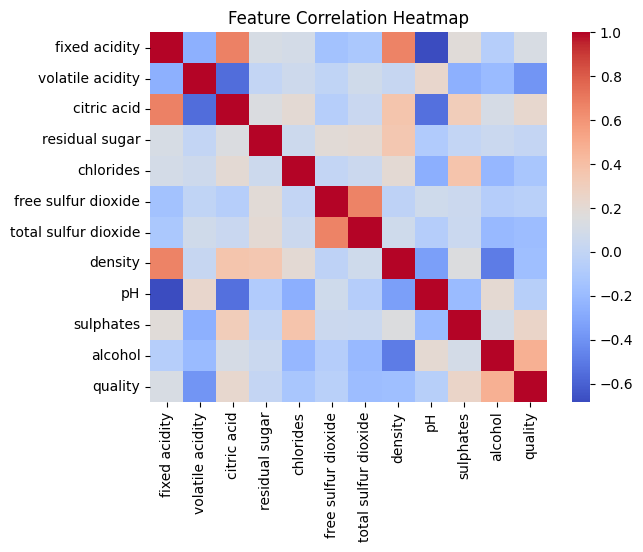

In [10]:
# Correlation heatmap
plt.figure()
sns.heatmap(data.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

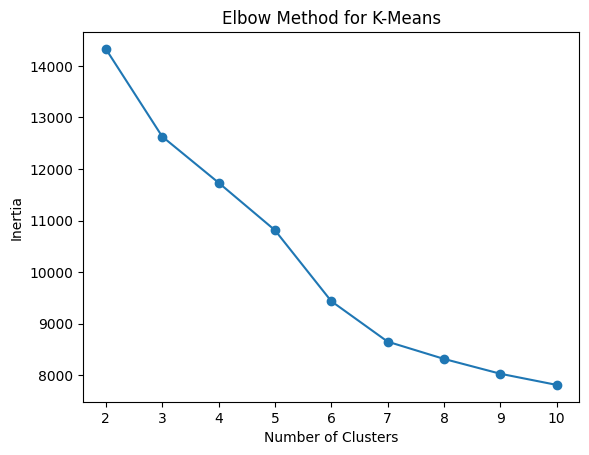

In [11]:
# K-Means – Elbow Method
inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

In [12]:
# K-Means Clustering
# Choosing the optimal clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [13]:
# Silhouette Score
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_kmeans

np.float64(0.18920406811092624)

In [14]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_scaled)

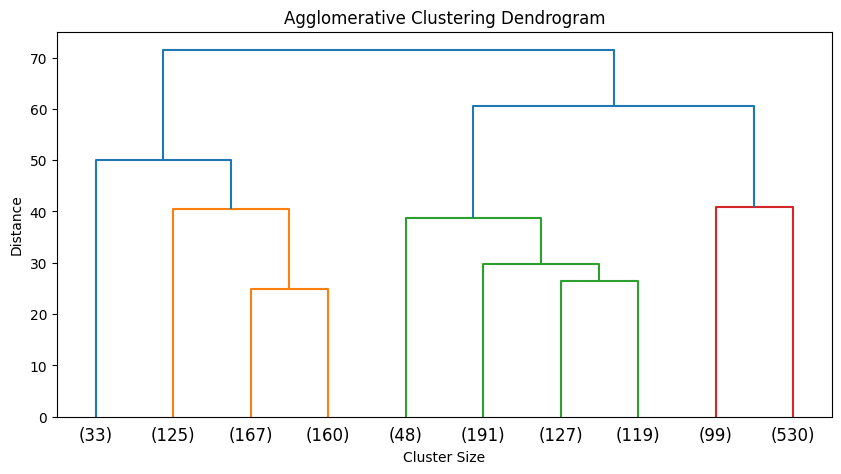

In [15]:
# Dendrogram Visualization
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title("Agglomerative Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [16]:
# Evaluation Metrics
# K-Means Metrics
kmeans_homogeneity = homogeneity_score(y, kmeans_labels)
kmeans_completeness = completeness_score(y, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

# Agglomerative Metrics
agg_homogeneity = homogeneity_score(y, agg_labels)
agg_completeness = completeness_score(y, agg_labels)
agg_ari = adjusted_rand_score(y, agg_labels)

kmeans_homogeneity, kmeans_completeness, kmeans_ari

(np.float64(0.05219151470510314),
 np.float64(0.058172196018080304),
 0.029207815457349982)

In [17]:
agg_homogeneity, agg_completeness, agg_ari

(np.float64(0.06385473121951135),
 np.float64(0.06935293556322486),
 0.044352154675365865)

In [ ]:
## Results Summary
### K-Means Clustering
- Silhouette Score = Moderate cluster separation
- Homogeneity = Measures purity of clusters
- Strengths = Fast and scalable
- Weaknesses = Sensitive to initial centroids

### Agglomerative Clustering
- Produces hierarchical structure
- Better interpretability via dendrogram
- Strengths = Does not require predefined centroids
- Weaknesses = Computationally expensive

### Conclusion
K-Means is efficient for large datasets. While Agglomerative Clustering provides better interpretability. These methods have meaningful structure but need careful clustering selection.